In [19]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [20]:
%autoreload 2

In [21]:
from flows.model.model import FlowModel

from experiments.test_functions import u1
import torch

(1000000,)


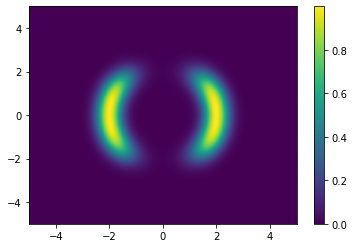

In [22]:
# libraries
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import kde
 
# create data
size = 5
 
nbins = 1000
xi, yi = np.mgrid[-size:size:nbins*1j, -size:size:nbins*1j]

wi = torch.Tensor(np.vstack([xi.flatten(), yi.flatten()]))
# zi = u1()
zi = u1(wi).detach().numpy()
print(zi.shape)
# Change color palette
plt.pcolormesh(xi, yi, zi.reshape(xi.shape), shading='auto')
plt.colorbar()
plt.show()

In [23]:
from flows.model.model import FlowModel
from flows.embedding.basic import Basic
from pyro.distributions.transforms import Planar

k = 2
dims = 2
embedding = Basic(dims)
transforms = list([Planar(dims) for i in range(0,k)])

model = FlowModel(
    embedding=embedding,
    transforms=transforms
)

In [24]:
model(torch.tensor([1,1])).sample()

tensor([-0.6960, -0.8498])

In [25]:
from flows.loss.elbo import FlowELBO
from tqdm import tqdm_notebook
from pyro.optim import SGD
from pyro.contrib.autoguide import AutoContinuous
from pyro.infer.trace_elbo import Trace_ELBO
from pyro.infer.svi import SVI

batch_size = 64
args = {}


In [26]:
optimizer = torch.optim.RMSprop(model.parameters(), lr=0.00001, momentum=0.9)


/tmp/ipykernel_680003/2456818375.py:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  pbar = tqdm_notebook(range(50000))


  0%|          | 0/50000 [00:00<?, ?it/s]

/home/john/.local/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


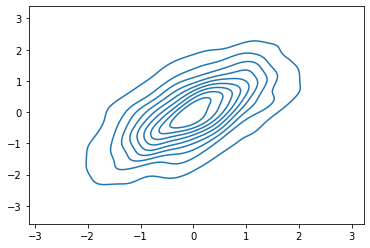

/home/john/.local/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


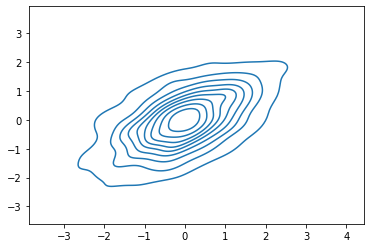

/home/john/.local/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


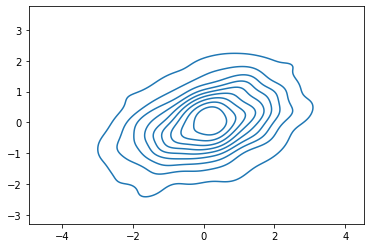

/home/john/.local/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


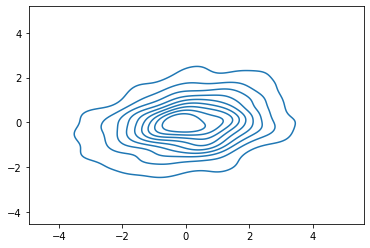

/home/john/.local/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


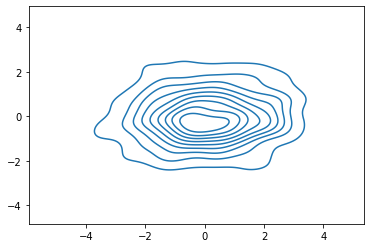

ValueError: Expected parameter loc (Tensor of shape (2,)) of distribution MultivariateNormal(loc: torch.Size([2]), covariance_matrix: torch.Size([2, 2])) to satisfy the constraint IndependentConstraint(Real(), 1), but found invalid values:
tensor([nan, nan], grad_fn=<ExpandBackward0>)

In [28]:

import seaborn as sns
import matplotlib.pyplot as plt

pbar = tqdm_notebook(range(50000))
for step in pbar:
    optimizer.zero_grad()
    loss = FlowELBO(u1, model(torch.tensor([1,1])), num_samples=100, epoch=step)
    pbar.set_postfix_str("loss: " + '{0:.2f}'.format(loss.item()))
    loss.backward()
    optimizer.step()
    if step % 2000 == 0:
        samples = model(torch.tensor([1,1])).sample((1000,)).detach()
        sns.kdeplot(x=samples[:,0].detach().numpy(), y=samples[:,1].detach().numpy())
        plt.show()
    # print("{: >5d}\t{}".format(step, loss ))

torch.Size([1000, 2])


/home/john/.local/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


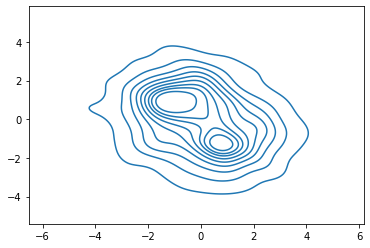

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

samples = model(torch.tensor([1,1])).sample((1000,))
print(samples.shape)
sns.kdeplot(samples[:,0].detach().numpy(), samples[:,1].detach().numpy())
plt.show()

In [ ]:
list(model.named_parameters())

[('embedding.mean',
  Parameter containing:
  tensor([-0.0271, -0.0086], requires_grad=True)),
 ('embedding.cov',
  Parameter containing:
  tensor([[1.5755, 0.1109],
          [0.1109, 1.3552]], requires_grad=True)),
 ('transforms.0.bias',
  Parameter containing:
  tensor([0.0425], requires_grad=True)),
 ('transforms.0.u',
  Parameter containing:
  tensor([ 0.4225, -1.1320], requires_grad=True)),
 ('transforms.0.w',
  Parameter containing:
  tensor([ 0.5268, -1.4175], requires_grad=True)),
 ('transforms.1.bias',
  Parameter containing:
  tensor([-0.3736], requires_grad=True)),
 ('transforms.1.u',
  Parameter containing:
  tensor([ 0.7200, -0.0655], requires_grad=True)),
 ('transforms.1.w',
  Parameter containing:
  tensor([ 1.3374, -0.8494], requires_grad=True))]